In [58]:
import os
import tarfile
from six.moves import urllib

In [59]:
DEVELOPERS_SALARY_2021_PATH = os.path.join("datasets", "salaries")
DEVELOPERS_URL = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip"

In [60]:
# Automating the process of fetching the housing data

#def fetch_salary_data(developers_url = DEVELOPERS_URL, developers_path = DEVELOPERS_SALARY_2021_PATH):
#    if not os.path.isdir(developers_path):
#        os.makedirs(developers_path)
    
 #   tgz_path = os.path.join(developers_path, "stack-overflow-developer-survey-2021.tgz")
 #    developers_tgz = tarfile.open(tgz_path)
#    developers_tgz.extractall(path = developers_path)
#    developers_tgz.close()

#fetch_salary_data()

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/salaries/survey_results_public_2020.csv")

In [62]:
df.head()
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [63]:
df = df[["Country","EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df= df.rename({"ConvertedComp": "Salary"}, axis =1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [64]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [66]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34025 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34025 non-null  object 
 1   EdLevel       34025 non-null  object 
 2   YearsCodePro  34025 non-null  object 
 3   Employment    34025 non-null  object 
 4   Salary        34025 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [68]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [69]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis =1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [70]:
df["Country"] = df["Country"].apply(lambda x: x.replace("United States", "United States of America"))

df["Country"].value_counts()

United States of America    7569
India                       2425
United Kingdom              2287
Germany                     1903
Canada                      1178
                            ... 
Benin                          1
Fiji                           1
San Marino                     1
Guinea                         1
Andorra                        1
Name: Country, Length: 154, dtype: int64

In [71]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    
    return categorical_map

In [72]:
country_map = shorten_categories(df.Country.value_counts(), 400)  

df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

Other                       8549
United States of America    7569
India                       2425
United Kingdom              2287
Germany                     1903
Canada                      1178
Brazil                       991
France                       972
Spain                        670
Australia                    659
Netherlands                  654
Poland                       566
Italy                        560
Russian Federation           522
Sweden                       514
Name: Country, dtype: int64

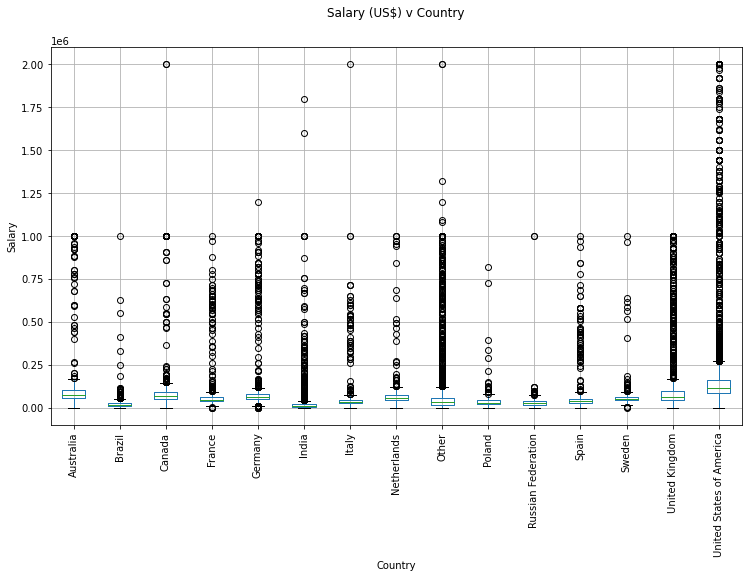

In [73]:
fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot("Salary", "Country", ax = ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [74]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]

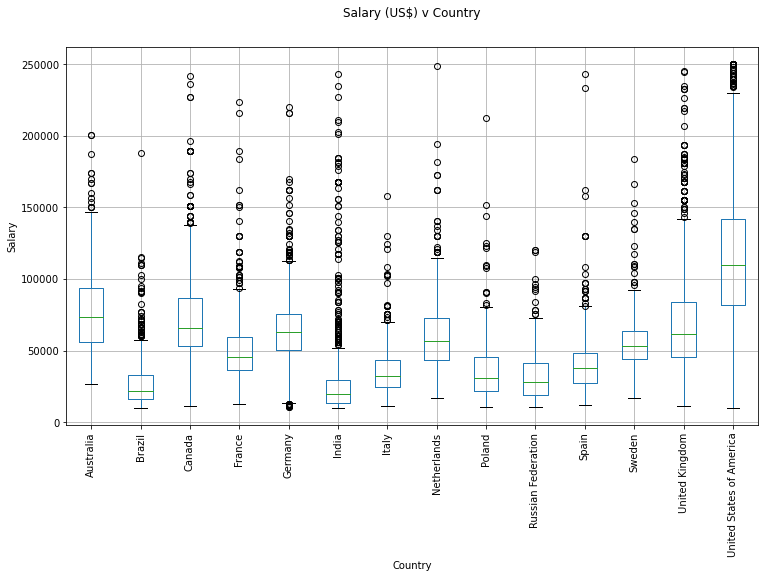

In [75]:
fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot("Salary", "Country", ax = ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [76]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [77]:
def clean_experience(x):
    if x == "More than 50 years":
        return 51
    if x == "Less than 1 year":
        return 0.5
    return float(x)


df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [78]:
df.YearsCodePro.unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 51. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 50. , 49. ])

In [79]:
df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [80]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if "Professional degree" in x or "doctoral degree" in x:
        return "Post grad"
    return "Less than a Bachelor's"

df["EdLevel"] = df["EdLevel"].apply(clean_education)

df.EdLevel.unique()

array(["Bachelor's degree", "Master's degree", "Less than a Bachelor's",
       'Post grad'], dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()

df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df.EdLevel.unique()

array([0, 2, 1, 3])

In [82]:
le_country = LabelEncoder()

df["Country"] = le_country.fit_transform(df["Country"])
df.Country.unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [83]:
X = df.drop("Salary", axis = 1)
y = df["Salary"]

In [84]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X, y.values)

LinearRegression()

In [85]:
y_pred = linear_reg.predict(X)

In [86]:
from sklearn.metrics  import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred))

In [87]:
error

39275.601440942424

In [88]:
import pickle

data = {"model": linear_reg, "le_country": le_country, "le_education": le_education,}

with open("saved_steps_linear_regression_2020.pkl", "wb") as file:
    pickle.dump(data, file)

In [89]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X, y.values)


DecisionTreeRegressor(random_state=0)

In [90]:
y_pred = dec_tree_reg.predict(X)

In [91]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [92]:
error

29414.938206831015

In [93]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state = 0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [94]:
y_pred = random_forest_reg.predict(X)

In [95]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [96]:
error

29487.342557878183

In [97]:
import pickle

data = {"model": random_forest_reg, "le_country": le_country, "le_education": le_education,}

with open("saved_steps_random_forest_2020.pkl", "wb") as file:
    pickle.dump(data, file)

In [98]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state = 0)
gs = GridSearchCV(regressor, parameters, scoring = "neg_mean_squared_error")
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [99]:
regressor = gs.best_estimator_
regressor.fit(X, y.values)

y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
error

30428.508362980854

In [100]:
X = np.array([["United States of America", "Master's degree", 15]])

In [101]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])

X = X.astype(float)
X

array([[13.,  2., 15.]])

In [102]:
y_pred = regressor.predict(X)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])

In [103]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_education,}

with open("saved_steps_2020.pkl", "wb") as file:
    pickle.dump(data, file)
    

In [104]:
with open("saved_steps_2020.pkl", "rb") as file:
    data = pickle.load(file)


regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [105]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])